## 신경망과 딥러닝
# CNN 개념

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

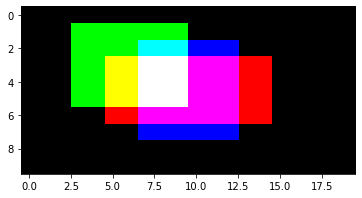

In [3]:
a = np.zeros([10,20,3])
a[3:7, 5:15, 0] = 1
a[1:6, 3:10, 1] = 1
a[2:8, 7:13, 2] = 1
plt.imshow(a)

### CNN 구조

<img src='https://community.arm.com/cfs-file/__key/communityserver-blogs-components-weblogfiles/00-00-00-21-42/Neural-Network-Model-Definition.jpg' />
(출처: https://community.arm.com/developer/ip-products/processors/b/processors-ip-blog/posts/deploying-convolutional-neural-network-on-cortex-m-with-cmsis-nn?CommentSortBy=CreatedDate&CommentSortOrder=Descending )<br>

<img src='cifar-10.jpg' />
(출처: https://arxiv.org/pdf/1611.04905.pdf )

<img src="https://ren-fengbo.lab.asu.edu/sites/default/files/styles/panopoly_image_full/public/fpga_accel_bcnn_fig_1.png?itok=bhU2jU8y" />
(출처: https://ren-fengbo.lab.asu.edu/content/gpu-outperforming-fpga-accelerator-architecture-binary-convolutional-neural-networks)

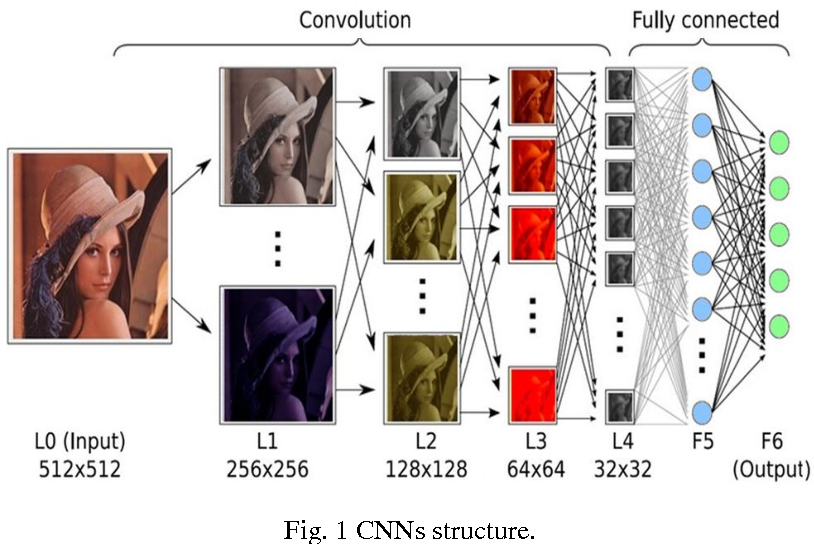

### Convolution

<img src="conv_1.jpg" />

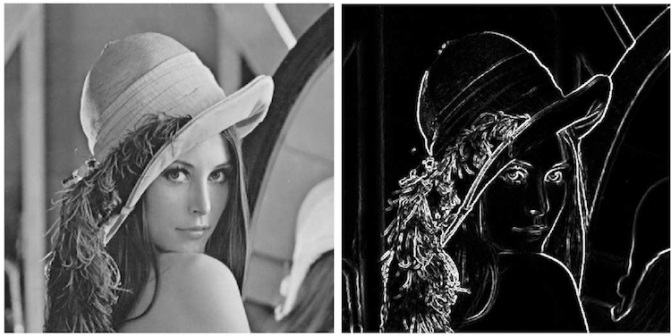

### Pooling (Resizing)

<img src="pooling_1.jpg" />

### CNN 맛보기
- MNIST 적용

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
X_train = X_train.reshape(60000,28,28,1)/255 # np.expand_dim(X_train, -1)
X_test = X_test.reshape(10000,28,28,1)/255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), padding='same',
                    activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
                    activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 12s 15ms/step - loss: 0.3723 - acc: 0.8930 - val_loss: 0.0966 - val_acc: 0.9736
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0839 - acc: 0.9741 - val_loss: 0.0926 - val_acc: 0.9717
Epoch 3/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0608 - acc: 0.9815 - val_loss: 0.0631 - val_acc: 0.9812
Epoch 4/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0479 - acc: 0.9849 - val_loss: 0.0488 - val_acc: 0.9852
Epoch 5/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0395 - acc: 0.9882 - val_loss: 0.0477 - val_acc: 0.9856
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0328 - acc: 0.9894 - val_loss: 0.0532 - val_acc: 0.9852
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0289 - acc: 0.9909 - val_loss: 0.0418 - val_acc: 0.9874
Epoch 8/20
375/375 [==============================] - 5s 14ms/step -

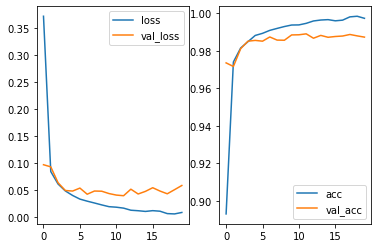

In [18]:
h = model.history.history

plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

In [19]:
pred_y = model.predict(X_test)
pred_y.shape

(10000, 10)

In [20]:
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.9879